# 1) INTRODUCTION 

The SAT, or Scholastic Aptitude Test, is a test that high school seniors in the U.S. take every year.  
The SAT has three sections, each of which is worth a maximum of 800 points. Colleges use the SAT to determine which students to admit. High average SAT scores are usually indicative of a good school.

New York City has published data on student SAT scores by high school, along with additional demographic data sets.  
Here's a link to the data https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4.  
Over the last three missions, we combined the following data sets into a single, clean pandas dataframe:

1. SAT scores by school - SAT scores for each high school in New York City
2. School attendance - Attendance information for each school in New York City
3. Class size - Information on class size for each school
4. AP test results - Advanced Placement (AP) exam results for each high school (passing an optional AP exam  
   in a particular subject can earn a student college credit in that subject)
5. Graduation outcomes - The percentage of students who graduated, and other outcome information
6. Demographics - Demographic information for each school
7. School survey - Surveys of parents, teachers, and students at each school  

New York City has a significant immigrant population and is very diverse, so comparing demographic factors such as race,  
income, and gender with SAT scores is a good way to determine whether the SAT is a fair test.  
For example, if certain racial groups consistently perform better on the SAT, we would have some evidence that the SAT is unfair.

In the last mission, we began performing some analysis.  
We'll extend that analysis in this mission.  
As you can see, we've included the code to read in all of the data, combine it, and create correlations in the notebook.  
The dataframe **combined** contains all of the data we'll be using in our analysis.

#### Instructions

+ Set up matplotlib to work in Jupyter notebook.
+ There are several fields in **combined** that originally came from a survey of parents, teachers, and students.  
  Make a bar plot of the correlations between these fields and sat_score.
  You can find a list of the fields in the **survey_fields** variable in the notebook.
+ Consult the data dictionary that's part of the zip file you can download from the City of New York's website.                     https://data.cityofnewyork.us/Education/2010-2011-NYC-School-Survey/mnz3-dyi8
+ Did you find any surprising correlations?
+ Write up your results in a Markdown cell.

In [1]:
import pandas
import numpy
import re

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

'''Add each of the dataframes to a data dictionary using the base of the filename as the key. 
For example, you'd enter ap_2010 for the file ap_2010.csv.'''

data = {}

for f in data_files:
    d = pandas.read_csv("schools/{0}".format(f))
    
    #extract key
    key_name = f.replace(".csv", "")
    
    #extract value
    data[key_name] = d
    

# 2) Read in the surveys

The files are tab delimited and encoded with Windows-1252 encoding.  
An encoding defines how a computer stores the contents of a file in binary.  
The most common encodings are UTF-8 and ASCII.  
Windows-1252 is rarely used, and can cause errors if we read such a file in without specifying the encoding.  
If you'd like to read more about encodings, here's a good primer.
http://kunststube.net/encoding/

We'll need to specify the encoding and delimiter to the pandas pandas.read_csv() function to ensure  
it reads the surveys in properly.After we read in the survey data, we'll want to combine it into  
a single dataframe. We can do this by calling the pandas.concat() function: 

```z = pd.concat([x,y], axis=0)```

The code above will combine dataframes x and y by essentially appending y to the end of x.  
The combined dataframe z will have the number of rows in x plus the number of rows in y.

+ Read in survey_all.txt.
  1. Use the **pandas.read_csv()** function to read **survey_all.txt** into the variable all_survey.  
     Recall that this file is located in the schools folder.
  2. Specify the keyword argument **delimiter="\t"**.
  3. Specify the keyword argument **encoding="windows-1252"**.
  
  
+ Read in survey_d75.txt.
  1. Use the **pandas.read_csv()** function to read **schools/survey_d75.txt** into the variable d75_survey.  
     Recall that this file is located in the schools folder.
  2. Specify the keyword argument **delimiter="\t"**.
  3. Specify the keyword argument **encoding="windows-1252"**.  
  
    
+ Combine d75_survey and all_survey into a single dataframe.
  1. Use the **pandas concat()** function with the keyword argument axis=0 to combine **d75_survey** and 
     **all_survey** into the dataframe survey.
  2. Pass in **all_survey** first, then **d75_survey** when calling the **pandas.concat()** function.
  3. Display the first five rows of survey using the **pandas.DataFrame.head()** function.
  
  
+ The survey data has a dbn column that we'll want to convert to uppercase (DBN).
  The conversion will make the column name consistent with the other data sets.
  
First, we'll need filter the columns to remove the ones we don't need.  
Luckily, there's a data dictionary at the original data download location  
https://data.cityofnewyork.us/Education/2010-2011-NYC-School-Survey/mnz3-dyi8.  

The dictionary tells us what each column represents.  
Based on our knowledge of the problem and the analysis we're trying to do, we can use the data dictionary to determine which columns to use.
  
Based on the dictionary, it looks like these are the relevant columns:  

```["dbn", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_11", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]```

These columns will give us aggregate survey data about how parents, teachers, and students feel about school safety, academic performance, and more. It will also give us the DBN, which allows us to uniquely identify the school.

Before we filter columns out, we'll want to copy the data from the dbn column into a new column called DBN. We can copy columns like this:

```survey["new_column"] = survey["old_column"]```

+ Copy the data from the dbn column of survey into a new column in survey called DBN.
+ Filter survey so it only contains the columns we listed above. You can do this using pandas.DataFrame.loc[].
+ Remember that we renamed dbn to DBN; be sure to change the list of columns we want to keep accordingly.
+ Assign the dataframe survey to the key survey in the dictionary data.
+ When you're finished, the value in ```data["survey"]``` should be a dataframe with 23 columns and 1702 rows.


In [2]:
all_survey = pandas.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pandas.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')

#combine the rows
survey = pandas.concat([all_survey, d75_survey], axis=0)

#rename the dbn column 
survey["DBN"] = survey["dbn"]

#select only the columns you are interested in 
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_10", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]


 #df.loc[:, ['x', 'w']]
survey = survey.loc[:, survey_fields]
data["survey"] = survey

C:\WinPython\python-3.6.5.amd64\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
C:\WinPython\python-3.6.5.amd64\lib\site-packages\pandas\core\indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


# 3) Add DBN columns

When we explored all of the data sets, we noticed that some of them, like class_size and hs_directory, don't have a DBN column. hs_directory does have a dbn column, though, so we can just rename it.

However, class_size doesn't appear to have the column at all. Here are the first few rows of the data set:

```CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED```


Here are the first few rows of the sat_results data, which does have a DBN column:


```DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES
1  01M448            UNIVERSITY NEIGHBORHOOD HIGH SCHOOL
2  01M450                     EAST SIDE COMMUNITY SCHOOL
3  01M458                      FORSYTH SATELLITE ACADEMY
4  01M509                        MARTA VALLE HIGH SCHOOL```

From looking at these rows, we can tell that the DBN in the sat_results data is just a combination of the CSD and SCHOOL CODE columns in the class_size data.The main difference is that the DBN is padded, so that the CSD portion of it always consists of two digits. That means we'll need to add a leading 0 to the CSD if the CSD is less than two digits long. 
As you can see, whenever the CSD is less than two digits long, we need to add a leading 0. 
We can accomplish this using the pandas pandas.DataFrame.apply() method, along with a custom function that:


+ Takes in a number.
+ Converts the number to a string using the str() function.
+ Check the length of the string using the len() function.
+ If the string is two digits long, returns the string.
+ If the string is one digit long, adds a 0 to the front of the string, then returns it.
+ You can use the string method **zfill()** to do this.
+ Once we've padded the CSD, we can use the addition operator **(+)** to combine the values in the CSD and 
  SCHOOL CODE columns. Here's an example of how we would do this:

```dataframe["new_column"] = dataframe["column_one"] + dataframe["column_two"]```

+ Copy the dbn column in hs_directory into a new column called DBN.
+ Create a new column called padded_csd in the class_size data set.
+ Use the **pandas.Series.apply()** method along with a custom function to generate this column.
+ Make sure to apply the function along the **data["class_size"]["CSD"]** column.
+ Use the addition operator **(+)** along with the padded_csd and SCHOOL CODE columns of class_size, 
  then assign the result to the DBN column of class_size.
+ Display the first few rows of class_size to double check the DBN column.


In [3]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return string_representation.zfill(2)
    
#format : column.apply(function)    
data["class_size"]["padded_csd"] = data["class_size"]["CSD"].apply(pad_csd)


#the dbn column combines the padded_csd and the schoolcode columns
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]



In [4]:
data["class_size"].head(4)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015


# 4) Combine the Datasets into one 

Now we're almost ready to combine our data sets.  
Before we do, let's take some time to calculate variables that will be useful in our analysis.  
We've already discussed one such variable -- a column that totals up the SAT scores for the different sections of the exam.  
This will make it much easier to correlate scores with demographic factors because we'll be working with a single number, rather than three different ones.

Before we can generate this column, we'll need to convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns in the sat_results data set from the object (string) data type to a numeric data type.  
We can use the pandas.to_numeric() method for the conversion.  
If we don't convert the values, we won't be able to add the columns together.

It's important to pass the keyword argument errors="coerce" when we call pandas.to_numeric(), so that pandas treats any invalid strings it can't convert to numbers as missing values instead. After we perform the conversion, we can use the addition operator (+) to add all three columns together.


+ Convert the SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score columns in 
  the **sat_results** data set from the object (string) data type to a numeric data type.
+ Use the **pandas.to_numeric()** function on each of the columns, and assign the result back to the same column.
  Pass in the keyword argument **errors="coerce"**.
+ Create a column called **sat_score** in **sat_results** that holds the combined SAT score for each student.
+ Add up **SAT Math Avg. Score, SAT Critical Reading Avg. Score, and SAT Writing Avg. Score**, and assign the total 
  to the **sat_score** column of sat_results.
+ Display the first few rows of the sat_score column of sat_results to verify that everything went okay.

In [5]:
#convert columns to numeric
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']

for c in cols:
    data["sat_results"][c] = pandas.to_numeric(data["sat_results"][c], errors="coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]



In [6]:
data['sat_results']['sat_score'].head()

0    1122.0
1    1172.0
2    1149.0
3    1174.0
4    1207.0
Name: sat_score, dtype: float64

# 5) Parsing Geographic Coordinates for Schools

Next, we'll want to parse the latitude and longitude coordinates for each school.  
This will enable us to map the schools and uncover any geographic patterns in the data.  
The coordinates are currently in the text field Location 1 in the hs_directory data set.

Let's take a look at the first few rows:

```0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026...
2    1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
3    411 Pearl Street\nNew York, NY 10038\n(40.7106...
4    160-20 Goethals Avenue\nJamaica, NY 11432\n(40...```


As you can see, this field contains a lot of information we don't need.  
We want to extract the coordinates, which are in parentheses at the end of the field. Here's an example:

```1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)```

We want to extract the latitude, 40.8276026690005, and the longitude, -73.90447525699966.  
Taken together, latitude and longitude make up a pair of coordinates that allows us to pinpoint any location on Earth.  
We can do the extraction with a regular expression.  
The following expression will pull out everything inside the parentheses:


```import re
re.findall("\(.+\)", "1110 Boston Road\nBronx, NY 10456\n(40.8276026690005, -73.90447525699966)")```  
Ref: https://www.youtube.com/watch?v=YCSPhLOMPFM

This command will return ```(40.8276026690005, -73.90447525699966)```.  
We'll need to process this result further using the string methods **split() and replace()** methods to extract each coordinate.

. Write a function that:
  + Takes in a string
  + Uses the regular expression above to extract the coordinates
  + Uses string manipulation functions to pull out the latitude
  + Returns the latitude
  + Use the **df.apply()** method to apply the function across the Location 1 column of hs_directory.
  + Assign the result to the lat column of hs_directory.
  + Display the first few rows of hs_directory to verify the results.

In [7]:
def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)

data["hs_directory"]["lat"] = pandas.to_numeric(data["hs_directory"]["lat"], errors="coerce")
data["hs_directory"]["lon"] = pandas.to_numeric(data["hs_directory"]["lon"], errors="coerce")

In [8]:
data["hs_directory"].head()

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",09X327,40.842414,-73.916162
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",02M280,40.710679,-74.000807
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40...",28Q680,40.718810,-73.806500


# 6) Condense datasets

In this mission, we'll clean the data a bit more, then combine it.  
Finally, we'll compute correlations and perform some analysis.

The first thing we'll need to do in preparation for the merge is condense some of the data sets.  
In the last mission, we noticed that the values in the DBN column were unique in the sat_results data set.  
Other data sets like class_size had duplicate DBN values, however.

We'll need to condense these data sets so that each value in the DBN column is unique.  
If not, we'll run into issues when it comes time to combine the data sets.

While the main data set we want to analyze, sat_results, has unique DBN values for every high school in New York City, other data sets aren't as clean.  
**A single row in the sat_results data set may match multiple rows in the class_size data set, for example.  
This situation will create problems, because we don't know which of the multiple entries in the class_size data set we should combine with the single matching entry in sat_results.**

We can't just combine the rows from both data sets because there are several cases where multiple rows in class_size match a single row in sat_results.  
**To resolve this issue, we'll condense the class_size, graduation, and demographics data sets so that each DBN is unique.**

The first data set that we'll condense is class_size.  
As you can see, the first few rows all pertain to the same school, which is why the DBN appears more than once.  
It looks like each school has multiple values for GRADE, PROGRAM TYPE, CORE SUBJECT (MS CORE and 9-12 ONLY),and CORE COURSE (MS CORE and 9-12 ONLY).If we look at the unique values for GRADE, we get the following:


```array(['0K', '01', '02', '03', '04', '05', '0K-09', nan, '06', '07', '08','MS Core', '09-12', '09'], dtype=object)```

Because we're dealing with high schools, we're only concerned with grades 9 through 12. That means we only want to pick rows where the value in the GRADE column is 09-12.

If we look at the unique values for PROGRAM TYPE, we get the following:

```array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)
array(['GEN ED', 'CTT', 'SPEC ED', nan, 'G&T'], dtype=object)```

Each school can have multiple program types. Because GEN ED is the largest category by far, let's only select rows where PROGRAM TYPE is GEN ED.

+ Create a new variable called class_size, and assign the value of ```data["class_size"]``` to it.
+ Filter class_size so the GRADE column only contains the value 09-12. 
  Note that the name of the GRADE column has a space at the end; you'll generate an error if you don't include it.
+ Filter class_size so that the PROGRAM TYPE column only contains the value GEN ED.
+ Display the first five rows of class_size to verify.

In [9]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]
class_size.head(4)

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,padded_csd,DBN
225,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 9,-,63.0,3.0,21.0,19.0,25.0,STARS,NaN,01,01M292
226,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 10,-,79.0,3.0,26.3,24.0,31.0,STARS,NaN,01,01M292
227,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 11,-,38.0,2.0,19.0,16.0,22.0,STARS,NaN,01,01M292
228,1,M,M292,Henry Street School for International Studies,09-12,GEN ED,ENGLISH,English 12,-,69.0,3.0,23.0,13.0,30.0,STARS,NaN,01,01M292


# 7) Computing Average Class Sizes

As we saw when we displayed class_size on the last screen,DBN still isn't completely unique.  
This is due to the **CORE COURSE (MS CORE and 9-12 ONLY)** and **CORE SUBJECT (MS CORE and 9-12 ONLY)** columns.

**CORE COURSE (MS CORE and 9-12 ONLY)** and **CORE SUBJECT (MS CORE and 9-12 ONLY)** seem to pertain to different kinds of classes.  
For example, here are the unique values for **CORE SUBJECT (MS CORE and 9-12 ONLY)**:

```array(['ENGLISH', 'MATH', 'SCIENCE', 'SOCIAL STUDIES'], dtype=object)```

This column only seems to include certain subjects.  
We want our class size data to include every single class a school offers -- not just a subset of them. 
What we can do is take the average across all of the classes a school offers. 
This will give us unique DBN values, while also incorporating as much data as possible into the average.

Fortunately, we can use the **pandas.DataFrame.groupby()** method to help us with this.  
Using the **groupby() method**, we'll split this dataframe into four separate groups -- one with the **DBN 01M292**, one with the **DBN 01M332**, one with the **DBN 01M378**, and one with the **DBN 01M448**.  
The **DataFrame.groupby()** method will split a dataframe up into unique groups, based on a given column.  
We can then use the **agg()** method on the resulting **pandas.core.groupby** object to find the mean of each column.

+ Find the average values for each column associated with each DBN in class_size.
+ Use the **pandas.DataFrame.groupby()** method to group class_size by DBN.
+ Use the **agg() method** on the resulting pandas.core.groupby object,along with the  
  **numpy.mean()** function as an argument,to calculate the average of each group.
+ Assign the result back to class_size.
+ Reset the index to make DBN a column again.
+ Use the **pandas.DataFrame.reset_index()** method, along with the keyword argument inplace=True.
+ Assign class_size back to the class_size key of the data dictionary.
+ Display the first few rows of ```data["class_size"]``` to verify that everything went okay.

In [10]:
class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size



In [11]:
data["class_size"].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


# 8) Condensing the Demographics Data Set

Now that we've finished condensing class_size, let's condense demographics.  
In this case, the only column that prevents a given DBN from being unique is **schoolyear.**  
We only want to select rows where schoolyear is **20112012.**  
This will give us the most recent year of data, and also match our SAT results data.

+ Filter demographics, only selecting rows in ```data["demographics"]``` where schoolyear is 20112012.  
  . schoolyear is actually an integer, so be careful about how you perform your comparison.
+ Display the first few rows of data["demographics"] to verify that the filtering worked.

In [12]:
data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

In [13]:
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


# 9) Condensing the Graduation Data Set

Finally, we'll need to condense the graduation data set.  
The Demographic and Cohort columns are what prevent DBN from being unique in the graduation data.  
A Cohort appears to refer to the year the data represents, and the Demographic appears to refer to a specific demographic group.   
In this case, we want to pick data from the most recent Cohort available, which is **2006**.  
We also want data from the full cohort, so we'll only pick rows where Demographic is **Total Cohort.

+ Filter graduation, only selecting rows where the Cohort column equals **2006**.
+ Filter graduation, only selecting rows where the Demographic column equals **Total Cohort**.
+ Display the first few rows of ```data["graduation"]``` to verify that everything worked properly.

In [14]:
data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]

In [15]:
data["demographics"].head()

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
13,01M019,P.S. 019 ASHER LEVY,20112012,NaN,61.5,328,32,46,52,54,...,81,24.7,158,48.2,28,8.5,147.0,44.8,181.0,55.2
20,01M020,PS 020 ANNA SILVER,20112012,NaN,92.5,626,52,102,121,87,...,55,8.8,357,57.0,16,2.6,330.0,52.7,296.0,47.3
27,01M034,PS 034 FRANKLIN D ROOSEVELT,20112012,NaN,99.7,401,14,34,38,36,...,90,22.4,275,68.6,8,2.0,204.0,50.9,197.0,49.1
35,01M063,PS 063 WILLIAM MCKINLEY,20112012,NaN,78.9,176,18,20,30,21,...,41,23.3,110,62.5,15,8.5,97.0,55.1,79.0,44.9


# 10) Converting AP Test Scores

We're almost ready to combine all of the data sets.  
The only remaining thing to do is convert the **Advanced Placement (AP)** test scores from strings to numeric values.  
High school students take the AP exams before applying to college.  
There are several AP exams, each corresponding to a school subject.  
High school students who earn high scores may receive college credit.

**AP exams have a 1 to 5 scale; 3 or higher is a passing score.**  
Many high school students take AP exams -- particularly those who attend academically challenging institutions.  
AP exams are much more rare in schools that lack funding or academic rigor.

It will be interesting to find out whether AP exam scores are correlated with SAT scores across high schools.  
**To determine this, we'll need to convert the AP exam scores in the ap_2010 data set to numeric values first.**
There are three columns we'll need to convert:

1. AP Test Takers (note that there's a trailing space in the column name)
2. Total Exams Taken
3. Number of Exams with scores 3 4 or 5

+ Convert each of the following columns in ap_2010 to numeric values using the **pandas.to_numeric()** 
  function with the keyword argument errors="coerce".
  1. AP Test Takers
  2. Total Exams Taken
  3. Number of Exams with scores 3 4 or 5
+ Display the column types using the dtypes attribute.


In [16]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

for col in cols:
    data["ap_2010"][col] = pandas.to_numeric(data["ap_2010"][col], errors="coerce")

# 11)  Combine the datasets

Both the ap_2010 and the graduation data sets have many missing DBN values, so we'll use a **left join** when we merge the **sat_results** data set with them.  
Because we're using a left join, our final dataframe will have all of the same DBN values as the original sat_results dataframe.

We'll need to use the pandas **df.merge()** method to merge dataframes.  
**The "left" dataframe is the one we call the method on, and the "right" dataframe is the one we pass into df.merge().**

Because we're using the DBN column to join the dataframes, we'll need to specify the keyword argument on="DBN" when calling pandas.DataFrame.merge().

First, we'll assign ``data["sat_results"]`` to the variable combined.  
Then, we'll merge all of the other dataframes with combined.  
When we're finished, combined will have all of the columns from all of the data sets.

+ Use the pandas **pandas.DataFrame.merge()** method to merge the **ap_2010** data set into combined.
+ Make sure to specify **how="left"** as a keyword argument to indicate the correct join type.
+ Make sure to assign the result of the merge operation back to combined.
+ Use the pandas **df.merge()** method to merge the graduation data set into combined.
+ Make sure to specify **how="left"** as a keyword argument to get the correct join type.
+ Make sure to assign the result of the merge operation back to combined.
+ Display the first few rows of combined to verify that the correct operations occurred.
+ Use the **pandas.DataFrame.shape** attribute to display the shape of the dataframe and see how many rows now exist.


In [17]:
combined = data["sat_results"]

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")



In [18]:
combined.head()


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,34,27.4%,64.2%,11,8.9%,20.8%,46,37.1%,20,16.100000000000001%
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,67,74.400000000000006%,95.7%,3,3.3%,4.3%,15,16.7%,5,5.6%
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,23,27.4%,48.9%,7,8.300000000000001%,14.9%,25,29.8%,5,6%


In [19]:
combined.shape

(479, 33)

# 12) Performing the Left Joins

Now that we've performed the left joins, we still have to merge **class_size,demographics,survey**, and **hs_directory**
into combined.

Because these files contain information that's more valuable to our analysis and also have fewer missing DBN values, 
we'll use the **inner join** type.

+ Merge **class_size** into combined.  
+ Then, merge demographics, survey, and hs_directory into combined one by one, in that order.
  . Be sure to follow the exact order above.  
  . Remember to specify the correct column to join on, as well as the correct join type.  
+ Display the first few rows of combined to verify that the correct operations occurred.  
+ Call **pandas.DataFrame.shape** to display the shape of the dataframe to see how many rows now exist.

In [20]:
to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")

In [21]:
combined.head(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,NaN,NaN,NaN,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426


In [22]:
combined.shape

(363, 159)

# 15) Filling in Missing Values

You may have noticed that the inner joins resulted in 116 fewer rows in **sat_results**.  
**This is because pandas couldn't find the DBN values that existed in sat_results in the other data sets.**  
While this is worth investigating, we're currently looking for high-level correlations,so we don't need to dive into which DBNs are missing.

You may also have noticed that we now have many columns with null (NaN) values.  
This is because we chose to do left joins, where some columns may not have had data.  
The data set also had some missing values to begin with.  
If we hadn't performed a left join, all of the rows with missing data would have been lost in the merge process, which wouldn't have left us with many high schools in our data set.

There are several ways to handle missing data, and we'll cover them in more detail later on.  
For now, we'll just fill in the missing values with the **overall mean** for the column.
We replace the missing values with the means of their respective columns, which allows us to  
proceed with analyses that can't handle missing values (like correlations).

We can fill in missing data in pandas using the **pandas.DataFrame.fillna()** method.  
This method will replace any missing values in a dataframe with the values we specify.  
We can compute the mean of every column using the **pandas.DataFrame.mean()** method.  
If we pass the results of the **df.mean()** method into the **df.fillna()** method, pandas will fill in the missing values in each column with the mean of that column.

Here's an example of how we would accomplish this:

```means = df.mean()
df = df.fillna(means)```  

Note that if a column consists entirely of null or NaN values, pandas won't be able to fill in the missing values when we use the **df.fillna()** method along with the **df.mean()** method, because there won't be a mean.

We should fill any NaN or null values that remain after the initial replacement with the value 0.  
We can do this by passing 0 into the **df.fillna()** method.

+ Calculate the means of all of the columns in combined using the **pandas.DataFrame.mean()** method.
+ Fill in any missing values in combined with the means of the respective columns using the **pandas.DataFrame.fillna()** method.
+ Fill in any remaining missing values in combined with 0 using the **df.fillna()** method.
+ Display the first few rows of combined to verify that the correct operations occurred.



In [23]:
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

In [24]:
combined.head(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,Then to Manhattan students or residents,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,0,0,0,0,0,0,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0,0,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426


# 16) Add a school district column for mapping

In [25]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(get_first_two_chars)

# 17) Find correlations

Correlations tell us how closely related two columns are. We'll be using the r value, also called Pearson's correlation coefficient, which measures how closely two sequences of numbers are correlated.

An r value falls between -1 and 1.  
The value tells us whether two columns are positively correlated, not correlated, or negatively correlated.  
The closer to 1 the r value is, the stronger the positive correlation between the two columns.  
The closer to -1 the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are).  
The closer to 0, the weaker the correlation. To learn more about r values, see the statistics course.  
https://www.dataquest.io/course/probability-statistics-beginner


In general, **r values above .25 or below -.25** are enough to qualify a correlation as interesting.  
An r value isn't perfect, and doesn't indicate that there's a correlation -- just the possiblity of one.  
To really assess whether or not a correlation exists, we need to look at the data using a scatterplot to see its "shape."

Because we're interested in exploring the fairness of the SAT, a strong positive or negative correlation between a demographic factor like race or gender and SAT score would be an interesting result meriting investigation.  
If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women, and vice-versa.

We can use the pandas **pandas.DataFrame.corr()** method to find correlations between columns in a dataframe.  
The method returns a new dataframe where the index for each column and row is the name of a column in the original data set.  

+ Use the **pandas.DataFrame.corr()** method on the combined dataframe to find all possible correlations.  
  Assign the result to **correlations**.
+ Filter correlations so that it only shows correlations for the column **sat_score**.
  Display all of the rows in correlations and look them over.

In [26]:
correlations = combined.corr()
correlations = correlations["sat_score"]
print(correlations)

SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -0.153778
ell_percent         

# 18) Plotting Correlations

+ Set up matplotlib to work in Jupyter notebook.
+ There are several fields in combined that originally came from a survey of parents, teachers, and students.
  Make a bar plot of the correlations between these fields and sat_score.
+ You can find a list of the fields in the survey_fields variable in the notebook.
+ Consult the data dictionary that's part of the zip file you can download from the City of New York's website.
+ Did you find any surprising correlations?


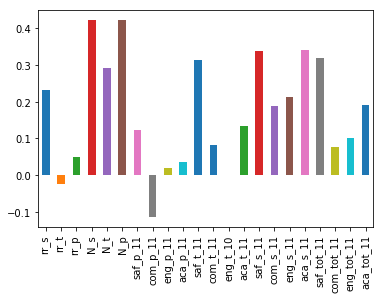

In [27]:
%matplotlib inline 
import matplotlib.pyplot as plt
from numpy import arange

# Remove DBN since it's a unique identifier, not a useful numerical value for correlation.
survey_fields.remove("DBN")
combined.corr()["sat_score"][survey_fields].plot.bar()


# 19)Correlations with sat_scores

On the last cell, you may have noticed that **saf_t_11 and saf_s_11**, which measure how teachers and students perceive safety at school, correlated highly with sat_score. On this screen, we'll dig into this relationship a bit more, and try to figure out which schools have low safety scores.

+ Investigate safety scores.
+ Make a scatter plot of the saf_s_11 column vs. the sat_score in combined.
+ Write up your conclusions about safety and SAT scores in a Markdown cell.
+ Map out safety scores.


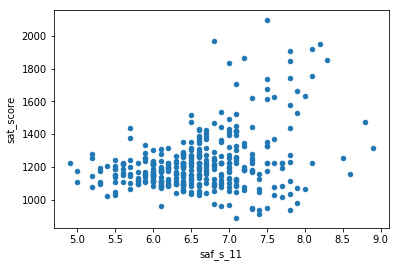

In [28]:
combined.plot.scatter("saf_s_11", "sat_score")

### Lower safety levels definately mean lower scores 

# 20) Safety Score for each district 

Map out safety scores.
+ Compute the average safety score for each district.
+ Make a map that shows safety scores by district.
+ Write up your conclusions about safety by geographic area in a Markdown cell.
  You may want to read up on the boroughs of New York City.


In [29]:
school_dist= combined.groupby('school_dist').agg(numpy.mean)
school_dist.reset_index(inplace=True)
school_dist['saf_s_11']

0     6.768611
1     6.910660
2     6.716667
3     6.885714
4     6.314286
5     6.950000
6     6.800000
7     6.364697
8     6.655000
9     6.577273
10    6.186667
11    7.116667
12    6.407692
13    6.685714
14    6.177778
15    5.875000
16    6.007143
17    6.190909
18    6.150000
19    7.120000
20    6.390909
21    7.025000
22    6.233333
23    7.107692
24    6.912500
25    6.760000
26    6.390000
27    6.627273
28    6.075000
29    7.033333
30    6.530000
31    6.766667
Name: saf_s_11, dtype: float64

# 21) Making mpl_toolkits work
Need to locate mpl_toolkits and tell setup.py where to find geos for mpl_toolkits to work 

In [30]:
import importlib
importlib.import_module('mpl_toolkits').__path__

['C:\\WinPython\\python-3.6.5.amd64\\lib\\site-packages\\mpl_toolkits']

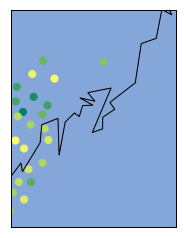

In [31]:
from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat= 40.9, 
    urcrnrlat= 40.5, 
    llcrnrlon=-73.9, 
    urcrnrlon=-74.3,
    resolution='i'
)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47',linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)

longitudes = school_dist["lon"].tolist()
latitudes = school_dist["lat"].tolist()
x, y = m(longitudes, latitudes)

districts = combined.groupby("school_dist").agg(numpy.mean)
districts.reset_index(inplace=True)

m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["saf_s_11"], cmap="summer")
m.drawcoastlines()
plt.show()


# 22) Exploring Race and SAT Scores

There are a few columns that indicate the percentage of each race at a given school:

. white_per
. asian_per
. black_per
. hispanic_per

By plotting out the correlations between these columns and sat_score, we can determine whether there are any racial differences in SAT performance.

####  Investigate racial differences in SAT scores.
+ Make a bar plot of the correlations between the columns above and sat_score.
Write up a Markdown cell containing your findings. Are there any unexpected correlations?

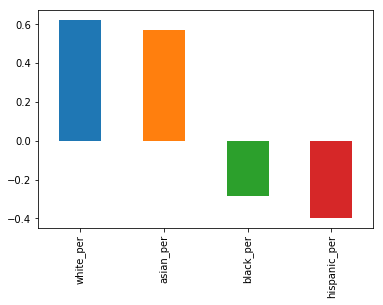

In [32]:
race_fields = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_score"][race_fields].plot.bar()


# 23) Exploring Hispanic SAT Scores 

+ Explore schools with low SAT scores and high values for hispanic_per.
+ Make a scatter plot of hispanic_per vs. sat_score.
+ What does the scatter plot show? Record any interesting observsations in a Markdown cell.

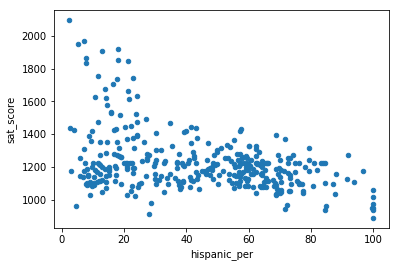

In [33]:
combined.plot.scatter("hispanic_per", "sat_score")

In [34]:
low_sat_high_hispanic = (combined['sat_score'] < 1000.0) & (combined['hispanic_per'] > 50.0)
low_sat_high_hispanic_val = combined[low_sat_high_hispanic]
combined.plot.scatter("hispanic_per", "sat_score")

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon,school_dist
91,07X334,INTERNATIONAL COMMUNITY HIGH SCHOOL,34,310.0,324.0,311.0,945.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"345 Brook Avenue\nBronx, NY 10454\n(40.8100361...",40.810036,-73.917812,07
125,09X365,ACADEMY FOR LANGUAGE AND TECHNOLOGY,54,315.0,339.0,297.0,951.0,Academy for Language and Technology,20.000000,20.000000,...,0,0,0,0,0,0,"1700 Macombs Road\nBronx, NY 10453\n(40.849102...",40.849102,-73.916088,09
126,09X403,BRONX INTERNATIONAL HIGH SCHOOL,49,314.0,312.0,339.0,965.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",40.827603,-73.904475,09
139,10X268,KINGSBRIDGE INTERNATIONAL HIGH SCHOOL,52,304.0,356.0,302.0,962.0,Kingsbridge International High School,32.000000,37.000000,...,0,0,0,0,0,0,"2780 Reservoir Avenue\nBronx, NY 10468\n(40.87...",40.870377,-73.898163,10
141,10X342,INTERNATIONAL SCHOOL FOR LIBERAL ARTS,49,300.0,333.0,301.0,934.0,International School for Liberal Arts,55.000000,73.000000,...,0,0,0,0,0,0,"2780 Reservoir Avenue\nBronx, NY 10468\n(40.87...",40.870377,-73.898163,10
176,12X388,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE,30,321.0,351.0,298.0,970.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"1300 Boynton Avenue\nBronx, NY 10472\n(40.8313...",40.831366,-73.878823,12
179,12X550,HIGH SCHOOL OF WORLD CULTURES,42,304.0,323.0,312.0,939.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"1300 Boynton Avenue\nBronx, NY 10472\n(40.8313...",40.831366,-73.878823,12
253,19K583,MULTICULTURAL HIGH SCHOOL,29,279.0,322.0,286.0,887.0,Multicultural High School,44.000000,44.000000,...,0,0,0,0,0,0,"999 Jamaica Avenue\nBrooklyn, NY 11208\n(40.69...",40.691144,-73.868426,19
286,24Q296,PAN AMERICAN INTERNATIONAL HIGH SCHOOL,55,317.0,323.0,311.0,951.0,0,129.028846,197.038462,...,0,0,0,0,0,0,"45-10 94Th Street\nElmhurst, NY 11373\n(40.743...",40.743303,-73.870575,24


### Research any schools with a hispanic_per greater than 95%.
+ Find the school names in the data.
+ Use Wikipedia and Google to research the schools by name.
+ Is there anything interesting about these particular schools? Record your findings in a Markdown cell.

In [35]:
hispanic_greater95 = combined['hispanic_per'] > 95.0
hispanic_greater95_val = combined[hispanic_greater95]

print (hispanic_greater95_val['SCHOOL NAME'])

44                         MANHATTAN BRIDGES HIGH SCHOOL
82      WASHINGTON HEIGHTS EXPEDITIONARY LEARNING SCHOOL
89     GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125                  ACADEMY FOR LANGUAGE AND TECHNOLOGY
141                INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176     PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253                            MULTICULTURAL HIGH SCHOOL
286               PAN AMERICAN INTERNATIONAL HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


### Research any schools with a hispanic_per less than 10% and an average SAT score greater than 1800.
+ Find the school names in the data.
+ Use Wikipedia and Google to research the schools by name.
+ Is there anything interesting about these particular schools? Record your findings in a Markdown cell.

In [41]:
high_sat_low_hispanic = (combined['sat_score'] > 1800.0) & (combined['hispanic_per'] < 10.0)
high_sat_low_hispanic_val = combined[high_sat_low_hispanic]
high_sat_low_hispanic_val


,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon,school_dist,ap_per
37,02M475,STUYVESANT HIGH SCHOOL,832,679.0,735.0,682.0,2096.0,STUYVESANT HS,1510.0,2819.0,...,0,0,0,0,0,"345 Chambers Street\nNew York, NY 10282\n(40.7...",40.717746,-74.014049,02,0.457992
151,10X445,BRONX HIGH SCHOOL OF SCIENCE,731,632.0,688.0,649.0,1969.0,BRONX HS OF SCIENCE,1190.0,2435.0,...,0,0,0,0,0,"75 West 205 Street\nBronx, NY 10468\n(40.87705...",40.877056,-73.889780,10,0.394955
187,13K430,BROOKLYN TECHNICAL HIGH SCHOOL,1277,587.0,659.0,587.0,1833.0,BROOKLYN TECHNICAL HS,2117.0,3692.0,...,0,0,0,0,0,"29 Ft Greene Place\nBrooklyn, NY 11217\n(40.68...",40.688107,-73.976745,13,0.397037
327,28Q687,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,121,612.0,660.0,596.0,1868.0,Queens HS for Science York Colllege,215.0,338.0,...,0,0,0,0,0,"94-50 159 Street\nJamaica, NY 11433\n(40.70099...",40.700999,-73.798154,28,0.514354
356,31R605,STATEN ISLAND TECHNICAL HIGH SCHOOL,227,635.0,682.0,636.0,1953.0,STATEN ISLAND TECHNICAL HS,528.0,905.0,...,0,0,0,0,0,"485 Clawson Street\nStaten Island, NY 10306\n(...",40.567913,-74.115362,31,0.478261


# 24) Exploring Gender and SAT Scores

There are two columns that indicate the percentage of each gender at a school:

+ male_per
+ female_per

We can plot out the correlations between each percentage and sat_score.

### Investigate gender differences in SAT scores.
+ Make a bar plot of the correlations between the columns above and sat_score.
+ Record your findings in a Markdown cell. Are there any unexpected correlations?
+ Investigate schools with high SAT scores and a high female_per.
+ Make a scatter plot of female_per vs. sat_score.
+ What does the scatter plot show? Record any interesting observations in a Markdown cell.
+ Research any schools with a female_per greater than 60% and an average SAT score greater than 1700.
  Find the school names in the data.
+ Use Wikipedia and Google to research the schools by name.
+ Is there anything interesting about these particular schools? Record your findings in a Markdown cell.


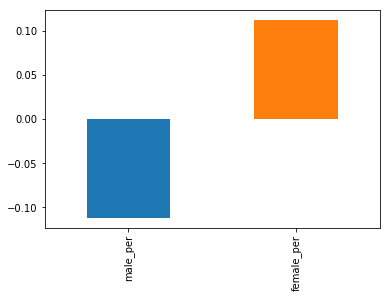

In [42]:
y1 = correlations['male_per']
y2 = correlations['female_per']

gender  = ["male_per", "female_per"]
combined.corr()["sat_score"][gender].plot.bar()

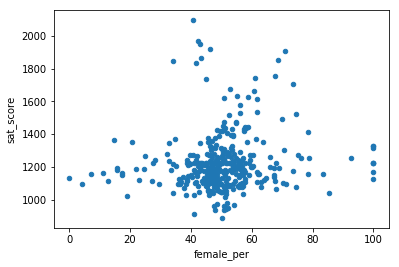

In [43]:
combined.plot.scatter("female_per", "sat_score")


In [39]:
high_female = combined['female_per'] > 60.0
high_sat = combined['sat_score'] > 1700.0

high_female_Sat = combined[high_female & high_sat]
print(high_female_Sat['SCHOOL NAME'])


5                         BARD HIGH SCHOOL EARLY COLLEGE
26                         ELEANOR ROOSEVELT HIGH SCHOOL
60                                    BEACON HIGH SCHOOL
61     FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...
302                          TOWNSEND HARRIS HIGH SCHOOL
Name: SCHOOL NAME, dtype: object


# 25) AP Exam Scores vs SAT Scores

In the U.S., high school students take Advanced Placement (AP) exams to earn college credit.  
There are AP exams for many different subjects.

It makes sense that the number of students at a school who took AP exams would be highly correlated with the school's SAT scores. Let's explore this relationship. Because total_enrollment is highly correlated with sat_score, we don't want to bias our results.Instead, we'll look at the percentage of students in each school who took at least one AP exam.

Calculate the percentage of students in each school that took an AP exam.
+ Divide the AP Test Takers column by the total_enrollment column.
+ The column name AP Test Takers has a space at the end -- don't forget to add it!
Assign the result to the ap_per column.
Investigate the relationship between AP scores and SAT scores.
Make a scatter plot of ap_per vs. sat_score.
What does the scatter plot show? Record any interesting observations in a Markdown cell.

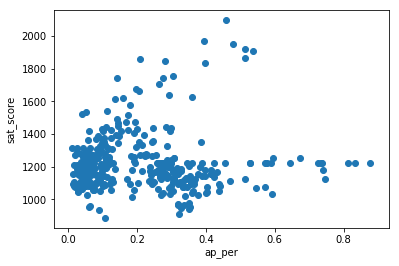

In [40]:
combined['ap_per'] = combined['AP Test Takers ']/combined['total_enrollment']

fig6,ax6 = plt.subplots()
ax6.scatter(combined['ap_per'],combined['sat_score'])
ax6.set_xlabel('ap_per')
ax6.set_ylabel('sat_score')
plt.show()